# Построение гистограммы рангов частот предложений

Рангом будем называть максимальную частоту, которую нужно взять в словаре, чтобы можно было построить предложение.

## Создание словарей языковых словарей

Словари взяты из википедии

1. Функция генерирующая языковой словарь на основе данного словаря:

In [23]:
def make_dict(filename:str, dict_len:int):
    _dict = {}
    with open(filename) as file:
        for i, line in enumerate(file, 1):
            _dict[line.split(' ')[0]] = i
            if i == dict_len:
                break
    return _dict

2. Создание русского и украинского словарей:

In [31]:
ru_dict = make_dict('dict.ru', -1)
uk_dict = make_dict('dict.uk', -1)

3. Примеры выборок из языковых словарей:

In [32]:
print(list(ru_dict.keys())[:5])
print(list(ru_dict.values())[20:25])
print(list(uk_dict.keys())[-10:])

['в', 'и', 'на', 'с', 'года']
[21, 22, 23, 24, 25]
['землевпорядкування', 'компактними', 'свалява', 'яєчних', 'поглинуло', 'десяткової', 'гібридизація', 'вовчанськ', 'рендалл', 'домовласників']


## Создание списков предложений

Предложение здесь -- список слов предложения в нижнем регистре из данного корпуса, т.е. можно работать с языковым словарем

1. Функция, реализующая разбиение в списки на основе данного корпуса

In [16]:
import re

def make_sentences(filename:str, encoding='utf-8'):
    # Загрузка всех предложений из файла в список
    sentences = []
    with open(filename, encoding=encoding) as file:
        sentences = file.readlines()
    
    # Разбиение предложений на слова в нижнем регистре
    words = []
    for sentence in sentences:
        words.append(re.split('[^\w]+', sentence.lower())[:-1])
    
    return words

2. Создание русского и украинского списков предложений

In [17]:
ru_sentences = make_sentences('OpenSubtitles2018.ru-uk.ru')
uk_sentences = make_sentences('OpenSubtitles2018.ru-uk.uk')

3. Примеры созданных предложений

In [18]:
print(ru_sentences[4])
print(uk_sentences[3:6])

['иными', 'словами', 'это', 'не', 'будет', 'новой', 'трактовкой', 'в', 'исполнении', 'обученных', 'музыкантов', 'и', 'я', 'думаю', 'это', 'только', 'к', 'лучшему']
[['зараз', 'ви', 'побачите', 'узори', 'картини', 'і', 'історії', 'що', 'створені', 'уявою', 'групи', 'художників', 'під', 'впливом', 'музики'], ['це', 'не', 'буде', 'новим', 'тлумаченням', 'музики', 'музикантами', 'і', 'для', 'нас', 'це', 'тільки', 'на', 'краще'], ['у', 'нашій', 'фантазії', 'звучатиме', 'три', 'типи', 'музики']]


## Нахождение рангов предложений

Пояснение: пусть у нас есть предложение из двух слов. Првое предложение встречается в нашем частотном словаре на 5-ом месте, второе слово -- на 10-ом. Тогда ранг предложения -- 10. Если есть слово, которое вообще не встретилось в словаре, ставим ему максимальный ранг, соответствующий длине словаря.

1. Функция, реализующая нахождение рангов предложений из списка предложений по списку языкового словаря

In [38]:
def calculate_ranks(sentences:list, lang_dict:dict):
    ranks = []
    max_rank = len(lang_dict)
    for sentence in sentences:
        rank = 0
        for word in sentence:
            rank = max(lang_dict.get(word, max_rank), rank)
            if rank == max_rank:
                break
        ranks.append(rank)
    return ranks

2. Вычисление рангов русских и украинских предложений

In [46]:
ru_ranks = calculate_ranks(ru_sentences, ru_dict)
uk_ranks = calculate_ranks(uk_sentences, uk_dict)

## Построение гистограммы

1. Настройка отображения

In [40]:
from matplotlib import pylab as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

2. Гистограмма рангов предложений для корпуса русских предложений

C:\Users\Egor\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


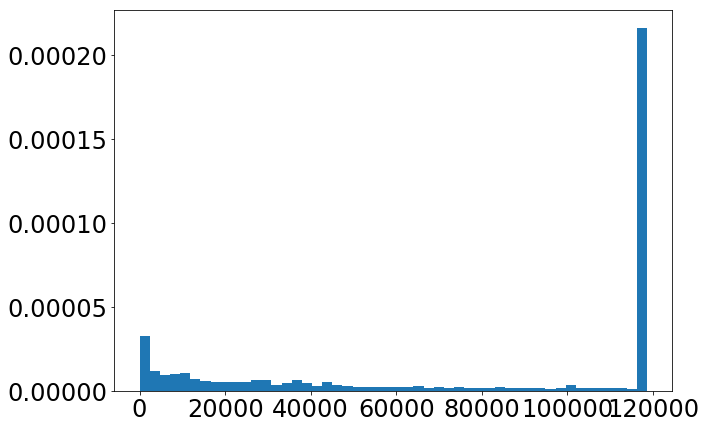

In [45]:
plt.figure(figsize=(10,7))
plt.hist(ru_ranks, bins=50, density=True)
plt.show()

3. Гистограмма рангов предложений для корпуса украинских предложений

C:\Users\Egor\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


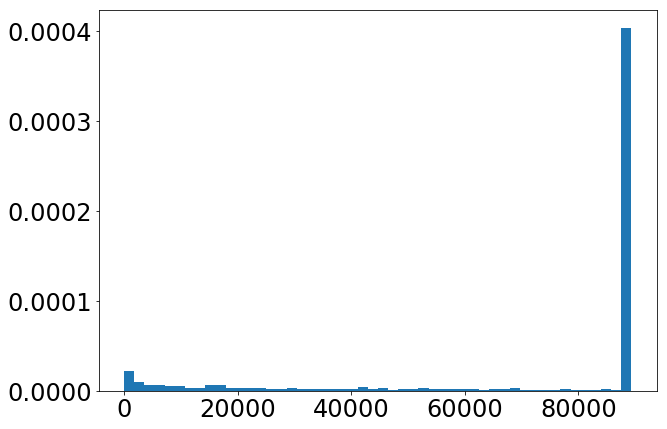

In [47]:
plt.figure(figsize=(10,7))
plt.hist(uk_ranks, bins=50, density=True)
plt.show()